In [1]:
from datetime import datetime

from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from_beginning = '1987-01-01'
# hang seng index start: 1987-01-01
name = '^HSI'

In [3]:
start_date = from_beginning
df = yf.download(name, start=start_date)

[*********************100%%**********************]  1 of 1 completed


In [38]:
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
last_30_years = f'{today.year - 29}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, last_30_years, start_date]

In [39]:


open_m = df['Open'].groupby([df.index.year, df.index.month]).first()
close_m = df['Close'].groupby([df.index.year, df.index.month]).last()
df_m = pd.DataFrame()
df_m['Open'] = open_m
df_m['Close'] = close_m
df_m.index.names = ['Year', 'Month']
df_m = df_m.reset_index()
df_m.index = [f"{df_m['Year'].iloc[i]}-{df_m['Month'].iloc[i]}-1" for i in range(len(df_m))]
df_m

,Year,Month,Open,Close
1987-1-1,1987,1,2540.100098,2553.300049
1987-2-1,1987,2,2585.199951,2877.899902
1987-3-1,1987,3,2894.300049,2713.800049
1987-4-1,1987,4,2695.899902,2659.899902
1987-5-1,1987,5,2685.399902,2950.800049
...,...,...,...,...
2024-4-1,2024,4,16811.740234,17763.029297
2024-5-1,2024,5,17760.679688,18079.609375
2024-6-1,2024,6,18283.560547,17718.609375
2024-7-1,2024,7,17669.419922,17344.599609


1-2, 3-4, ..., 11-12

In [70]:
def get_2months_results(_df_, _time):
    returns = []
    months = []
    years = []
    _df = _df_[_df_.index >= _time].copy().reset_index()
    
    for i in range(0, _df.shape[0] - 1):
        res = _df.loc[i + 1, 'Close'] / _df.loc[i, 'Open'] - 1
        time = str(_df.loc[i, 'Month']) + '-' + str(_df.loc[i + 1, 'Month'])
        
        returns.append(res)
        months.append(time)
        years.append(str(_df.loc[i, 'Year']) + '-' + str(_df.loc[i + 1, 'Year']))
    
    df_12 = pd.DataFrame({'Return': returns, 'Months': months, 'Years': years})
    
    table_12 = df_12.groupby('Months')['Return'].describe()
    table_12['mean / std'] = table_12['mean'] / table_12['std']
    table_12['Win Rate %'] = (df_12.groupby('Months')['Return'].apply(lambda x: (x > 0).sum()) 
                              / table_12['count'] * 100)
    table_12 = table_12.reset_index()
    months = {
        '1-2': 1, 
        '2-3': 2, 
        '3-4': 3, 
        '4-5': 4, 
        '5-6': 5,
        '6-7': 6, 
        '7-8': 7, 
        '8-9': 8, 
        '9-10': 9, 
        '10-11': 10,
        '11-12': 11, 
        '12-1': 12
    }
    
    indexes = [months[m] for m in table_12['Months']]
    table_12.index = indexes
    table_12.index.name = _time if _time != '1900-01-01' else from_beginning
    
    table_12 = table_12.sort_index()
    return table_12

In [76]:
get_2months_results(df_m, from_beginning)

,Months,count,mean,std,min,25%,50%,75%,max,mean / std,Win Rate %
1987-01-01,,,,,,,,,,,
1,1-2,38.0,0.022768,0.082589,-0.124082,-0.025344,0.009880,0.080182,0.174603,0.275681,60.526316
2,2-3,38.0,0.010082,0.090464,-0.216393,-0.038773,0.015314,0.064868,0.175378,0.111449,57.894737
3,3-4,38.0,0.015444,0.094307,-0.148231,-0.035436,0.006835,0.062138,0.339871,0.163769,55.263158
4,4-5,38.0,0.026724,0.102485,-0.222487,-0.016184,0.025978,0.072245,0.321895,0.260765,65.789474
5,5-6,38.0,0.002569,0.095515,-0.272096,-0.054207,0.011309,0.043405,0.183511,0.026901,55.263158
6,6-7,38.0,0.018687,0.080230,-0.123021,-0.051251,0.038547,0.075969,0.185781,0.232913,55.263158
7,7-8,38.0,-0.000545,0.087719,-0.180988,-0.073353,0.004008,0.064824,0.141498,-0.006213,50.000000
8,8-9,37.0,-0.023655,0.100535,-0.226352,-0.083712,-0.013784,0.053566,0.179174,-0.235288,48.648649
9,9-10,37.0,0.004847,0.159065,-0.395083,-0.044509,0.008221,0.086253,0.442781,0.030472,54.054054


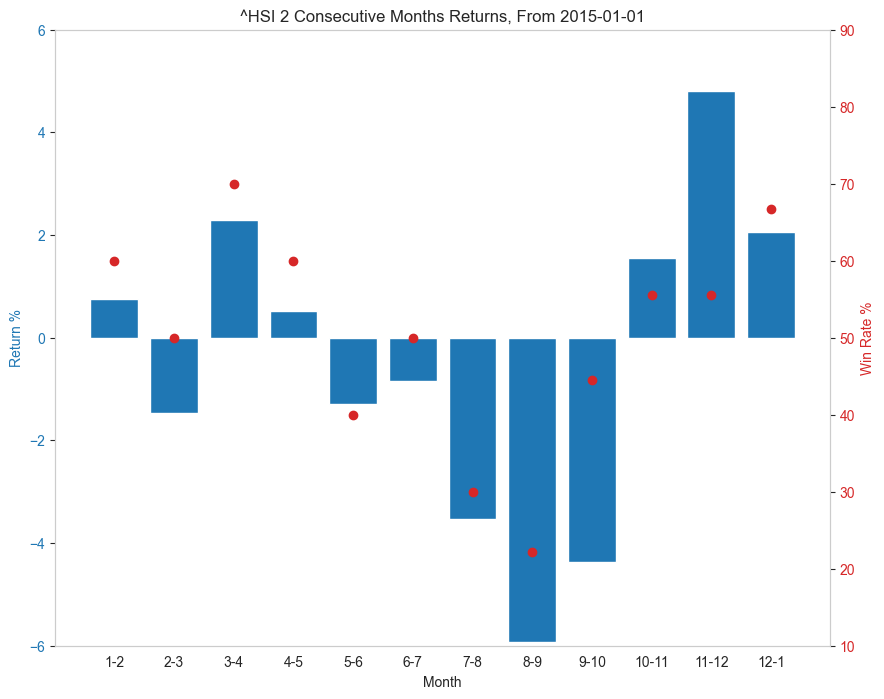

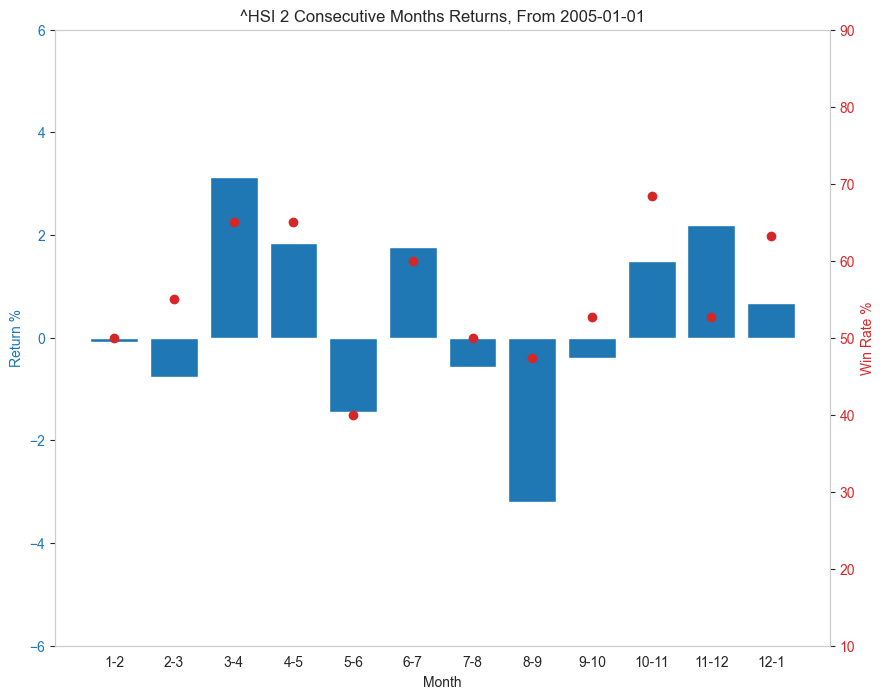

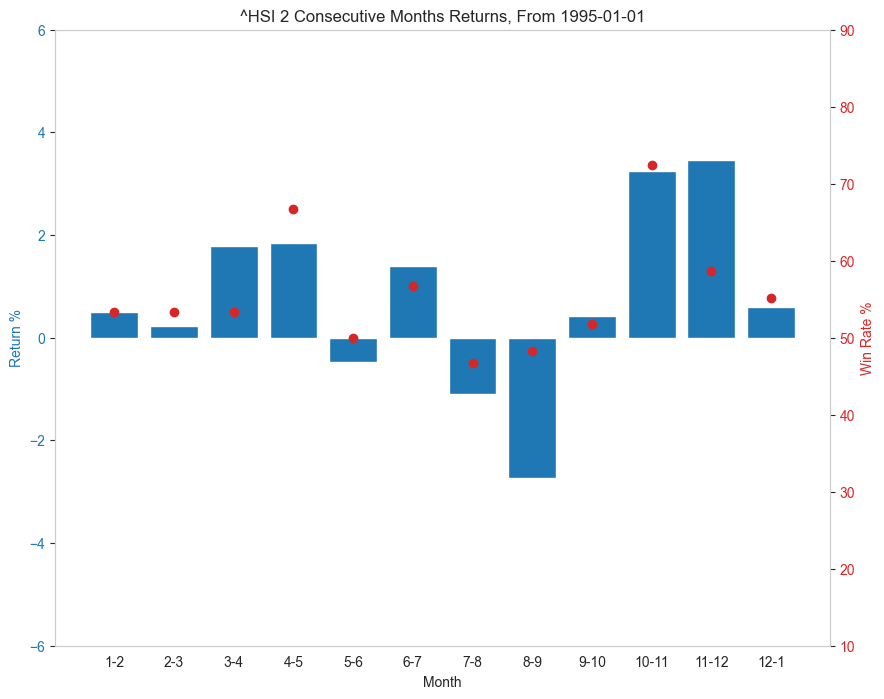

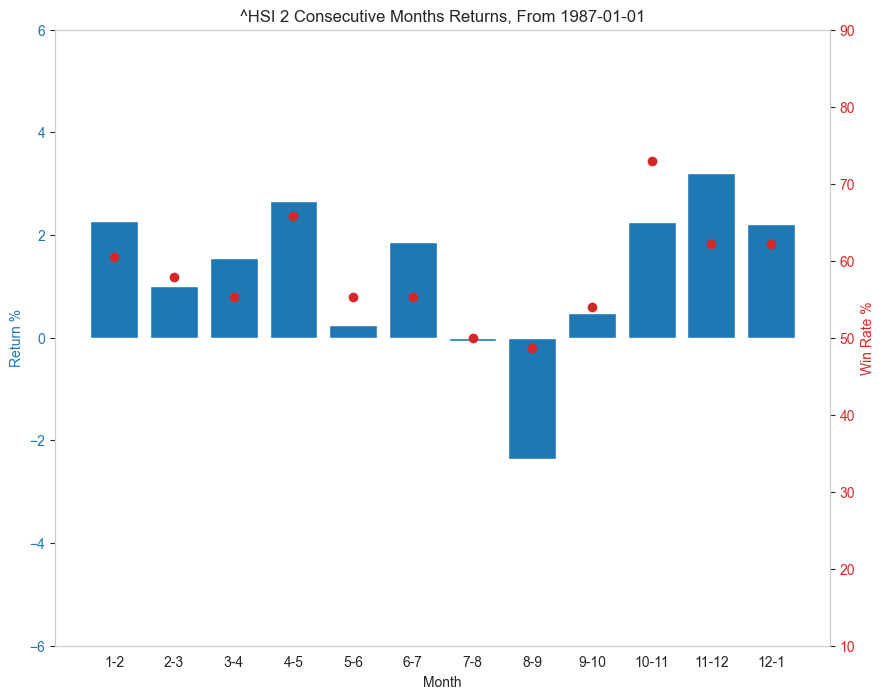

In [77]:
for n, t in enumerate(choices):
    _df = get_2months_results(df_m, t)
    
    fig, ax1 = plt.subplots(figsize=(10, 8))
    plt.grid(False)
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Return %', color=color)
    ax1.bar(x=_df['Months'], height=_df['mean'] * 100, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-6, 6)
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    plt.grid(False)
    color = 'tab:red'
    ax2.set_ylabel('Win Rate %', color=color)  # we already handled the x-label with ax1
    ax2.scatter(x=_df['Months'], y=_df['Win Rate %'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(10, 90)

    years = _df.index.name
    plt.title(f'{name} 2 Consecutive Months Returns, From {_df.index.name}')
    plt.show()